<a href="https://colab.research.google.com/github/jmatt724/ClassifcationUsingANN/blob/main/Classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the Dataset

In [211]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Validate.csv')

In [212]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Encode dependent variable

In [213]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

dataset['diagnosis'] = label_encoder.fit_transform(dataset['diagnosis'])

## Split the data

In [214]:
X = dataset.drop('diagnosis', axis = 1)
y = dataset['diagnosis']

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Build the model with tensorflow

In [217]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [218]:
n_features = X_train.shape[1]

In [219]:
model = Sequential()
model.add(Dense(10, activation = 'relu', input_shape=(n_features,)))

In [220]:
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compile the model

In [221]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 150,
                    validation_data = (X_test, y_test),
                    batch_size = 32, verbose = 0)

loss, acc = model.evaluate(X_test, y_test, verbose = 0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.965


## Plot the graph

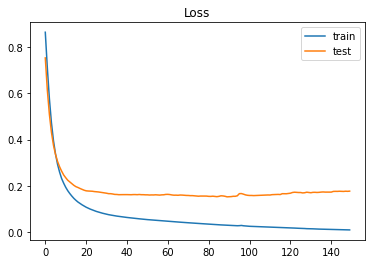

In [222]:
plt.title('Loss')
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

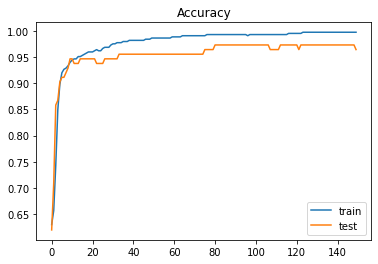

In [223]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [224]:
score, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.998


In [225]:
validation.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,0.1586,...,19.07,30.88,123.40,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
1,M,16.13,20.68,108.10,798.8,0.11700,0.20220,0.17220,0.10280,0.2164,...,20.96,31.48,136.80,1315.0,0.1789,0.4233,0.4784,0.20730,0.3706,0.11420
2,M,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615
3,B,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,15.11,19.26,99.70,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259
4,B,13.08,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.1890,0.07283,0.3184,0.08183


In [226]:
val_x = validation.drop('diagnosis', axis = 1)
val_y = validation['diagnosis']

In [227]:
label_encoder2 = LabelEncoder()
val_y = label_encoder2.fit_transform(val_y)

In [228]:
print('Train score:', score)
print('Train accuracy:', acc)

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = model.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Train score: 0.008572841994464397
Train accuracy: 0.9977827072143555
4/4 [==============================] - 0s 2ms/step
********************
12/12 [==============================] - 0s 2ms/step - loss: 0.1765 - accuracy: 0.9646
Test score: 0.17650337517261505
Test accuracy: 0.9646017551422119


In [229]:
print(cm)

[[65  1]
 [ 3 44]]


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        47

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



## Validation

In [231]:
validation_list = validation.values.tolist()
print(validation_list)

[['M', 14.68, 20.13, 94.74, 684.5, 0.09867, 0.072, 0.07395, 0.05259, 0.1586, 0.05922, 0.4727, 1.24, 3.195, 45.4, 0.005718, 0.01162, 0.01998, 0.01109, 0.0141, 0.002085, 19.07, 30.88, 123.4, 1138.0, 0.1464, 0.1871, 0.2914, 0.1609, 0.3029, 0.08216], ['M', 16.13, 20.68, 108.1, 798.8, 0.117, 0.2022, 0.1722, 0.1028, 0.2164, 0.07356, 0.5692, 1.073, 3.854, 54.18, 0.007026, 0.02501, 0.03188, 0.01297, 0.01689, 0.004142, 20.96, 31.48, 136.8, 1315.0, 0.1789, 0.4233, 0.4784, 0.2073, 0.3706, 0.1142], ['M', 19.81, 22.15, 130.0, 1260.0, 0.09831, 0.1027, 0.1479, 0.09498, 0.1582, 0.05395, 0.7582, 1.017, 5.865, 112.4, 0.006494, 0.01893, 0.03391, 0.01521, 0.01356, 0.001997, 27.32, 30.88, 186.8, 2398.0, 0.1512, 0.315, 0.5372, 0.2388, 0.2768, 0.07615], ['B', 13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766, 0.2699, 0.7886, 2.058, 23.56, 0.008462, 0.0146, 0.02387, 0.01315, 0.0198, 0.0023, 15.11, 19.26, 99.7, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259], ['B', 13.08, 15

In [232]:
for i in range (0, 5):
  data = validation_list[i][1:]
  if(model.predict(sc.transform([data])) > 0.5):
    print("Diagnosis: Benign")
  else:
    print("Diagnosis: Malignant")


1/1 [==============================] - 0s 17ms/step
Diagnosis: Benign
1/1 [==============================] - 0s 16ms/step
Diagnosis: Benign
1/1 [==============================] - 0s 18ms/step
Diagnosis: Benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


1/1 [==============================] - 0s 16ms/step
Diagnosis: Malignant
1/1 [==============================] - 0s 16ms/step
Diagnosis: Malignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
